# Descriptive analysis

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv('card_debt.csv')
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,AvgDebt
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
#First I check if the columns are correctly categorised
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  AvgDebt    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [6]:
#I inspect the numerical variable
data.describe()

,Income,Limit,Rating,Cards,Age,Education,AvgDebt
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
#I then inspect each categorical variable
print(data['Gender'].value_counts())
print(data['Student'].value_counts())
print(data['Married'].value_counts())
print(data['Ethnicity'].value_counts())

Female    207
Male      193
Name: Gender, dtype: int64
No     360
Yes     40
Name: Student, dtype: int64
Yes    245
No     155
Name: Married, dtype: int64
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


Text(0.5, 1.0, 'Ethnicity')

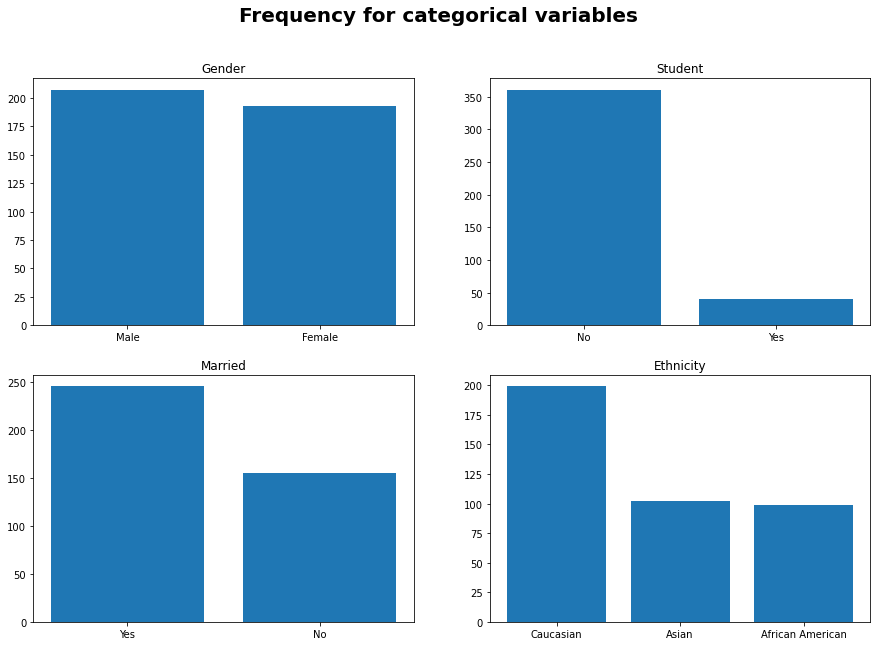

In [8]:
#I plot histograms to see the distribution of each categorical variable

import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Frequency for categorical variables',fontsize=20, fontweight='bold')

axs[0, 0].bar(data['Gender'].unique(),data['Gender'].value_counts())
axs[0, 0].set_title('Gender')

axs[0, 1].bar(data['Student'].unique(),data['Student'].value_counts())
axs[0, 1].set_title('Student')

axs[1, 0].bar(data['Married'].unique(),data['Married'].value_counts())
axs[1, 0].set_title('Married')

axs[1, 1].bar(data['Ethnicity'].unique(),data['Ethnicity'].value_counts())
axs[1, 1].set_title('Ethnicity')

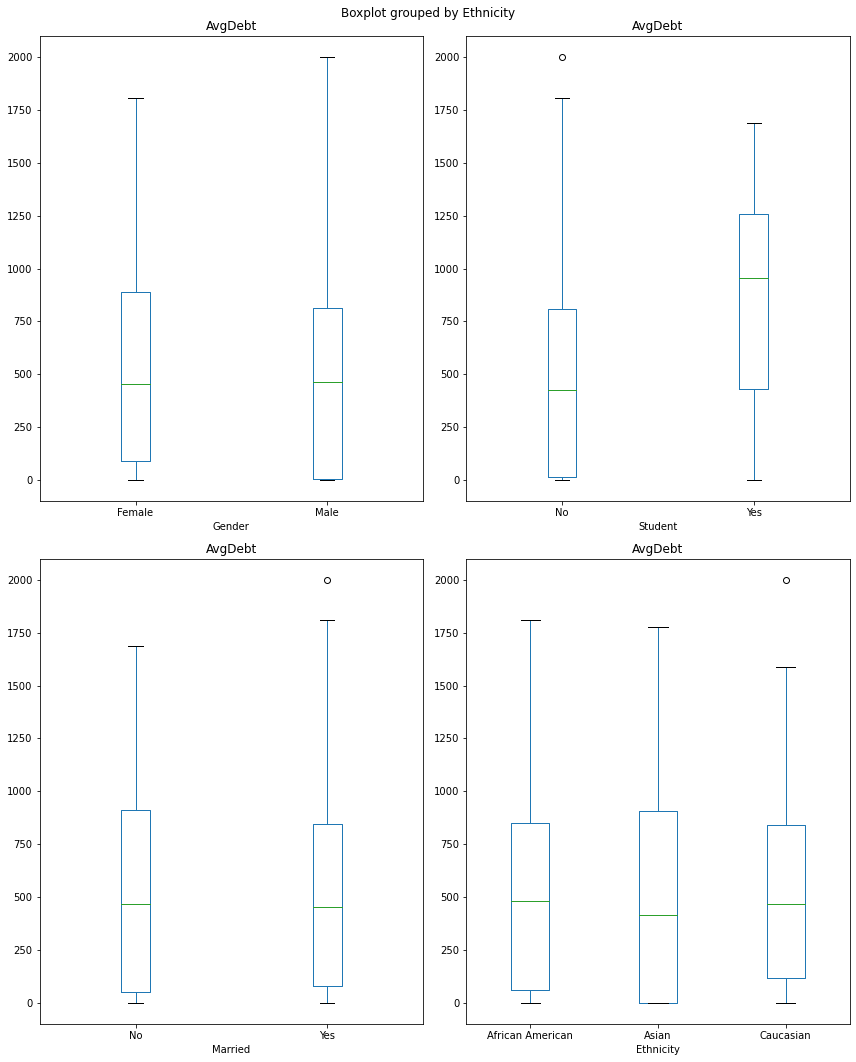

In [9]:
#I check every category in each categorical variable to observe their average debts

fig, axes = plt.subplots(2,2, figsize=(12,15))
fig.suptitle('The distribution of AvgDebt under each category',fontsize=40, fontweight='bold')

data.boxplot(column='AvgDebt', by='Gender', grid=False, ax=axes[0,0])
data.boxplot(column='AvgDebt', by='Student', grid=False, ax=axes[0,1])
data.boxplot(column='AvgDebt', by='Married', grid=False , ax=axes[1,0])
data.boxplot(column='AvgDebt', by='Ethnicity', grid=False, ax=axes[1,1])

plt.tight_layout() 

### <font color='teal'> From the boxplots above, I can observe that 'Gender', 'Married' and 'Ethnicity' do not have much effect on average debt as the boxplots are almost identical for each category. On the other hand, we can observe that students have a much higher median debt than non-student. The student status can be a strong predictor for average debt.</font>

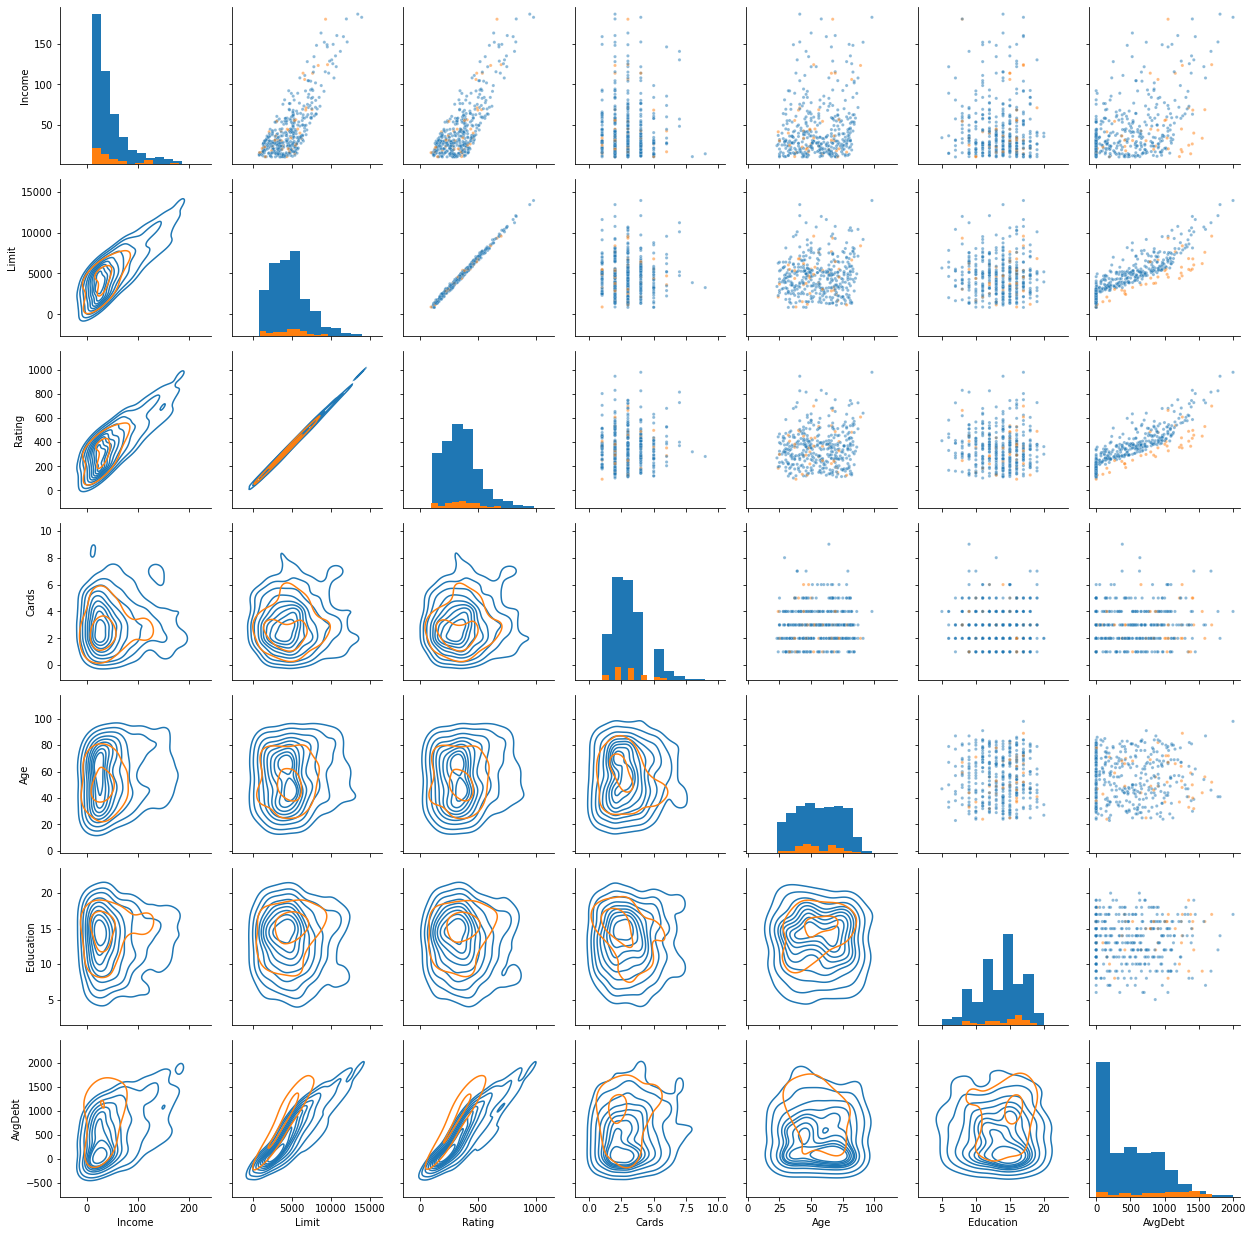

In [10]:
#For numerical value I use PairGrid to investigate the relationships with AvgDebt

import seaborn as sns
g = sns.PairGrid(data, hue='Student')
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w', s = 10, alpha = 0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

### <font color='teal'>From the above PairGrid, I can observe that both 'Limit' and 'Rating' have strong correlation with the target variable (AvgDebt). It is reasonable to put both variables to our prediction model. However, I also observe that 'Rating' and 'Limit' is highly correlated. In this case, it is useless to keep both so I may drop one. I will decide which one to drop by observing how these variables will affect the accuracy of our regression models.</font>

### <font color='teal'>We can also observe a general linear relationship between Income and AvgDebt. Income can be our potential predictor.</font>

### <font color='teal'>Finally, I confirm the importance of 'Student' status. By observing the orange highlights in the PairGrid, we can observe that the orange color is often concentrated in certain area in each graph but not dispersed randomly.</font>

In [11]:
#I want to confirm the relationship by looking at the correlation among variables

data.corr()

,Income,Limit,Rating,Cards,Age,Education,AvgDebt
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
AvgDebt,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


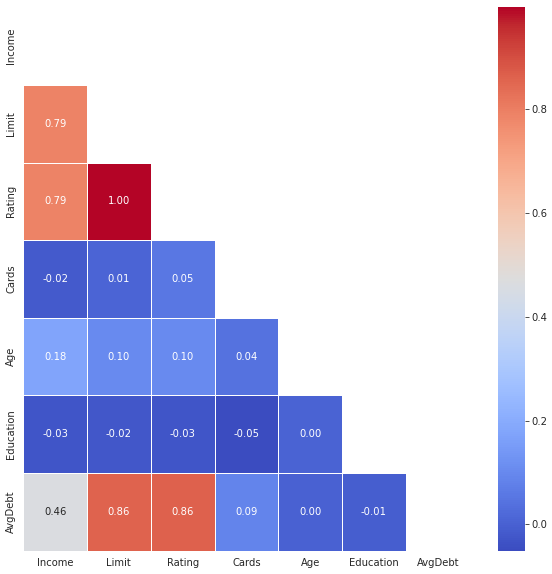

In [12]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, annot = True, fmt = '.2f', cbar = True, ax = ax, cmap="coolwarm",
                    linewidths=.5)

### <font color='teal'>From the correlation analysis, I can confirm my conclusion from the PairGrid. That is 'limit' and 'rating' are both highly correlated to AvgDebt but these two variables are perfectly positive correlated to each other (correlation=1) so I will only keep one in the model</font>

<AxesSubplot:>

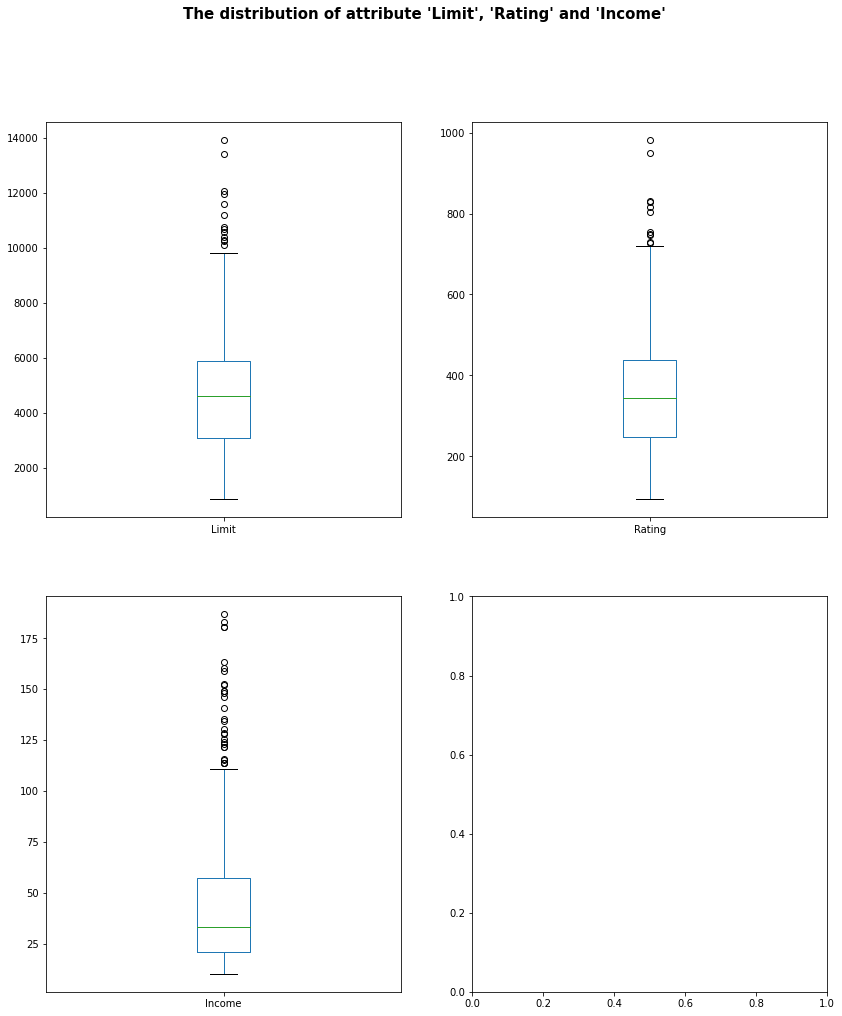

In [13]:
#I want to investigate more on variable Limit and Rating

fig, axes = plt.subplots(2,2, figsize=(14,16))
fig.suptitle("The distribution of attribute 'Limit', 'Rating' and 'Income'",fontsize=15, fontweight='bold')

data.boxplot(column='Limit', grid=False, ax=axes[0,0])
data.boxplot(column='Rating', grid=False, ax=axes[0,1])
data.boxplot(column='Income', grid=False, ax=axes[1,0])

Text(0, 0.5, 'Average Debt')

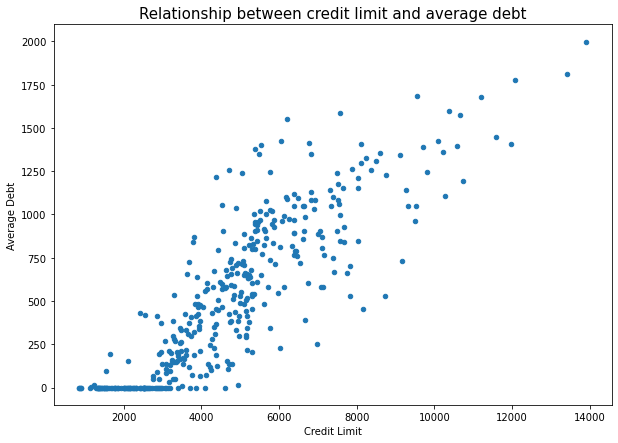

In [14]:
data.plot(kind  = 'scatter', x = 'Limit', y = 'AvgDebt', figsize = (10, 7))
plt.title('Relationship between credit limit and average debt', fontsize=15)
plt.xlabel('Credit Limit')
plt.ylabel('Average Debt')

Text(0, 0.5, 'Average Debt')

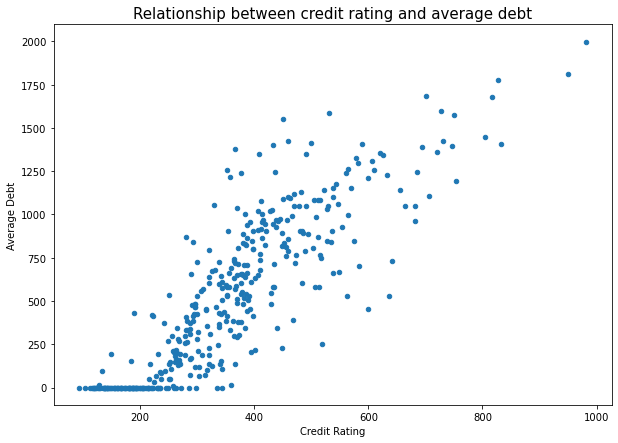

In [15]:
data.plot(kind  = 'scatter', x = 'Rating', y = 'AvgDebt', figsize = (10, 7))
plt.title('Relationship between credit rating and average debt', fontsize=15)
plt.xlabel('Credit Rating')
plt.ylabel('Average Debt')

Text(0, 0.5, 'Average Debt')

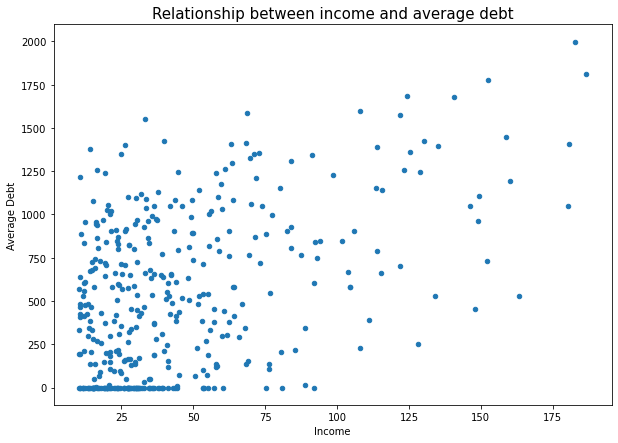

In [16]:
data.plot(kind  = 'scatter', x = 'Income', y = 'AvgDebt', figsize = (10, 7))
plt.title('Relationship between income and average debt', fontsize=15)
plt.xlabel('Income')
plt.ylabel('Average Debt')

### <font color='teal'>From the above scatter plot, I observe that average debt does have a linear relationship with both credit ratings and credit limit. However, one risk is identified: we can observe that there are a group of people with no debt at all, especially for the individuals with credit rating below 220 or credit limit below 3000. For these individuals, their average debts DO NOT have a linear relationship with their credit limit and credit rating. We should be extra careful with this group as they will affect our linear regression model.</font>

### <font color='teal'>We can also observe a linear relationship between average debt and income. I will include 'income' in the linear regression model.</font>

Text(0, 0.5, 'Credit Limit')

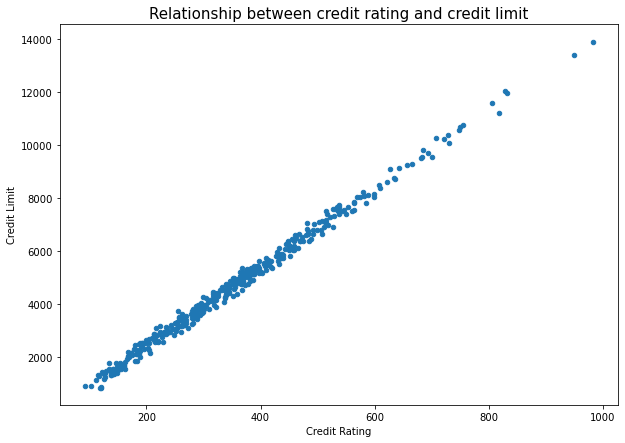

In [17]:
#This graph makes 100% sense, you must need a high credit rating to have a high credit limit

data.plot(kind  = 'scatter', x = 'Rating', y = 'Limit', figsize = (10, 7))
plt.title('Relationship between credit rating and credit limit', fontsize=15)
plt.xlabel('Credit Rating')
plt.ylabel('Credit Limit')

# Multiple Linear Regression Model

### <font color='teal'>I have decided to use student status, income and either credit rating or credit limit to predict the average debt.</font>

In [18]:
#First I need to create dummy variables for student column

dummy_vals = pd.get_dummies(data['Student'], drop_first=True, prefix='Student')
dummy_vals.head()

,Student_Yes
0,0
1,1
2,0
3,0
4,0


In [19]:
data_reg = data.join(dummy_vals)

m1 = smf.ols('AvgDebt ~ Student_Yes + Rating + Income', data = data_reg).fit()

In [20]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          6.23e-257
Time:                        11:44:40   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -581.0789     13.835    -42.002      0.000    -608.277    -553.880
Student_Yes   418.7603     17.230     24.304      0.000     384.886     452.634
Rating          3.9875      0.055     72.888      0.000       3.880       4.095
Income         -7.8749      0.240    -32.783      0.000      -8.347      -7.403
==============================================================================
Omnibus:                       13.580   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.236
Skew:                           0.445   Prob(JB):                     0.000810
Kurtosis:                       2.750   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color='teal'>We can observe that the model 1 has a very high r-squared, indicating that much of the variance of average debt can be explained by the predictors: student status, income and credit rating.</font>

### <font color='teal'>All our predictors have p-value below 0.05, indicating that they are all statistically significant in explaning average debt.</font>

### <font color='teal'>In order to further investigate the prediction of our model, I will plot some extra graphs in the following.</font>

In [21]:
from statsmodels.graphics import gofplots
from statsmodels.graphics import regressionplots
def plot_gof_figure(model):
    
    """
    Plot a multipane figure of goodness of fit plots
    """
    sns.residplot(model.fittedvalues, model.resid, lowess = True)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')
    plt.show()
    
    _ = gofplots.qqplot(model.resid, fit = True, line = '45')
    plt.title('Normal Q-Q')
    plt.show()
    
    plt.scatter(model.fittedvalues, np.abs(model.resid) ** 0.5)
    plt.xlabel('Fitted Values')
    plt.ylabel('Square Root of the standardized residuals')
    plt.title('Scale-Location')
    plt.show()
    
    regressionplots.plot_leverage_resid2(model)

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


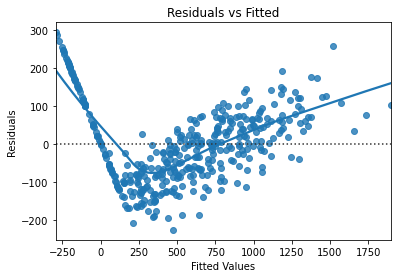

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


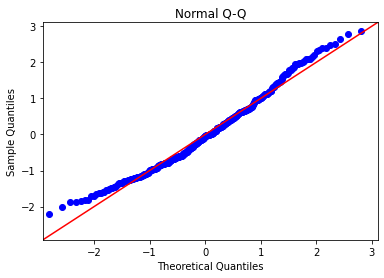

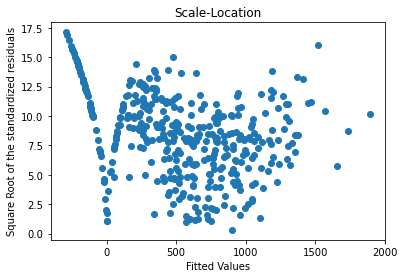

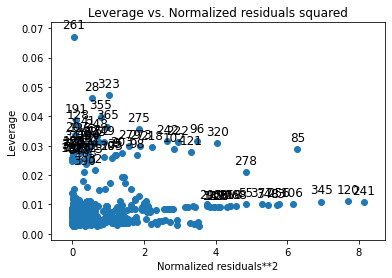

In [22]:
plot_gof_figure(m1)

### <font color='teal'>From the above graph, we can observe that the residuals of model 1 do not follow a normal distribution. The model performs poorly while predicting low average debt. This can be explained by the distribution of the average debt. If we look again at the scatter plot between average debt and credit rating, we can observe mostly a linear relationship except when the credit rating is low (i.e. 0-300). For those individuals, their average debt are almost all 0 and there's no linear relationship can be observed. </font>

### <font color='teal'> As we can see in the residual plot, the residuals of our modeal follow a pattern and that's something we should avoid.</font>

### <font color='teal'> In the following, I will create a model 2 replacing credit rating with credit limit and to see the result. Then I will try to address this 0 average debt problem.</font>

In [23]:
m2 = smf.ols('AvgDebt ~ Student_Yes + Limit + Income ', data = data_reg).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2447.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          4.00e-255
Time:                        11:44:43   Log-Likelihood:                -2424.9
No. Observations:                 400   AIC:                             4858.
Df Residuals:                     396   BIC:                             4874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -432.3374     12.431    -34.778      0.000    -456.777    -407.898
Student_Yes   427.0233     17.416     24.519      0.000     392.784     461.263
Limit           0.2675      0.004     72.069      0.000       0.260       0.275
Income         -7.9016      0.243    -32.495      0.000      -8.380      -7.424
==============================================================================
Omnibus:                       31.119   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.651
Skew:                           0.739   Prob(JB):                     1.10e-08
Kurtosis:                       3.115   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


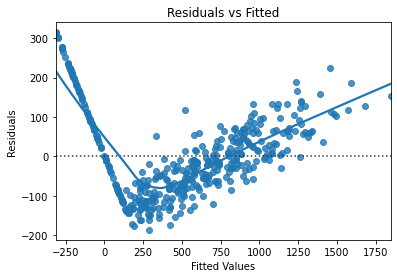

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


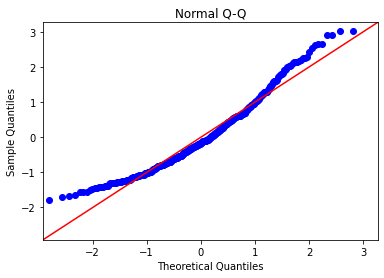

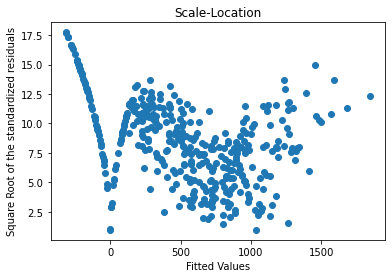

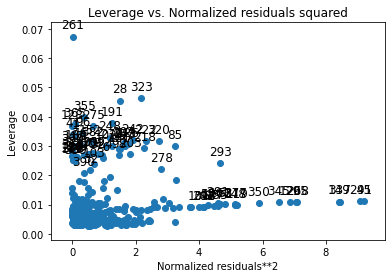

In [24]:
plot_gof_figure(m2)

### <font color='teal'>Model 2 is almost identical as model 1 in terms of r-square, variable's p-value and residuals. In the following discussion, I will use m1 as final model, meaning that I will predict average debt by student status, credit rating and income level.</font>

### <font color='teal'>As seen above, one of the problem of model 1 is that it is heavily affected by the large amount of indivudals with 0 debt. In order to handle this, I suggest that we should create a linear regression model separately for the individuals with average debt higher than 0, while setting a condition that we can predict the average debt as 0.</font>

### <font color='teal'>As I observe that most of the individuals with credit rating below 220 have 0 average debt. I will set this as a threshold and test the result.</font>

In [25]:
#I try to build a linear regression model for individuals who have debts

data_reg_2 = data_reg.query('Rating>220')
data_reg_2.describe()

,Income,Limit,Rating,Cards,Age,Education,AvgDebt,Student_Yes
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,50.790915,5470.003155,404.290221,3.012618,55.580442,13.438486,651.413249,0.100946
std,37.356500,2009.951701,134.854250,1.416393,17.335228,3.197136,426.703032,0.301734
min,10.354000,2586.000000,221.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,24.050000,3954.000000,300.000000,2.000000,42.000000,11.000000,302.000000,0.000000
50%,39.145000,5137.000000,377.000000,3.000000,55.000000,14.000000,611.000000,0.000000
75%,63.931000,6420.000000,468.000000,4.000000,69.000000,16.000000,955.000000,0.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


In [26]:
#We have 317 records, now I will build a model 3 to predict the average debt

m3 = smf.ols('AvgDebt ~ Student_Yes + Rating + Income ', data = data_reg_2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     5231.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          5.41e-267
Time:                        11:44:45   Log-Likelihood:                -1745.5
No. Observations:                 317   AIC:                             3499.
Df Residuals:                     313   BIC:                             3514.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -804.3601     12.406    -64.837      0.000    -828.770    -779.951
Student_Yes   481.1983     11.191     43.000      0.000     459.180     503.217
Rating          4.6790      0.043    109.289      0.000       4.595       4.763
Income         -9.5387      0.155    -61.695      0.000      -9.843      -9.234
==============================================================================
Omnibus:                        6.551   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                7.276
Skew:                           0.229   Prob(JB):                       0.0263
Kurtosis:                       3.583   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


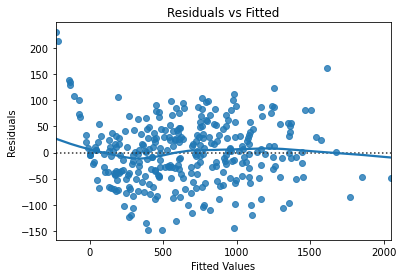

C:\Users\tonyi\anaconda3\envs\pypr\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


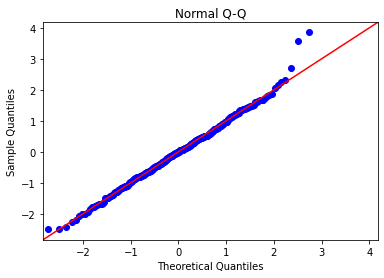

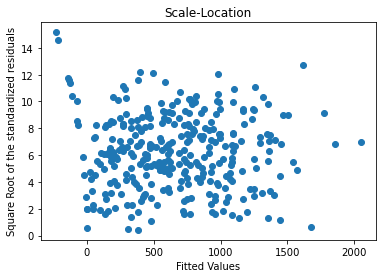

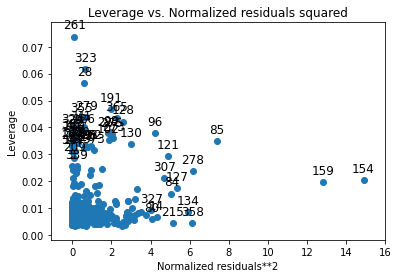

In [27]:
plot_gof_figure(m3)

### <font color='teal'>Model 3 shows a very statisfactory result. R-squared increases to 0.98, indicating that almost all the variance of average debt is captured by the model 3.</font>

### <font color='teal'>More importantly, the residuals in model 3 are more dispersed and they do not follow a specific pattern like those of model 1. From the QQ plot, we can also see that the residuals in model 3 follow a normal distribution.</font>

### <font color='teal'>Finally, regarding the condition of predicating 0 average debt, the scatter plots that I have done before showed that average debt is almost always 0 when the credit rating is less than 220. I have also tested other threshold but 220 is the best option. I will therefore set this as the criteria of 0 average debt. </font>

### <font color='blue'>Putting everything together, I will use model 3 predict the average debt when an individual has a credit rating above 220. For an individual with credit rating below 220, they are predicted to have 0 average debt</font>